Цель: Необходимо реализовать модель прогнозирования вероятности прекращения сотрудничества клиента с банком

Гипотеза: Клиенты с несколькими продуктами банка менее склонны к уходу

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Bank_data.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


*Просмотр статистики для выявления потенциальных проблем*

---


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В одном столбце (tenure) есть пропуски

Посмотрим описательную статистику данных

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Широкий разброс в распределениях по возрасту и балансу; большая часть клиентов активна и имеет кредитные карты, но при этом существенный процент ухода клиентов

*Обработка дубликатов*

---



In [ ]:
data[data.duplicated(keep=False)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


В данных нет полных дубликатов

Посмотрим частичные по столбцу CustomerIde, чтобы проверить явную ошибку в данных

In [ ]:
columnsId = ['CustomerId']
duplicatesId = data[data.duplicated(subset=columnsId, keep=False)]
duplicatesId

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


По индексу нет дубликатов

Посмотрим частичные по столбцам Surname, Geography, Gender, Age, CreditScore, потому что эти признаки могут указывать на дублирование

In [ ]:
subset_columns = ['Surname','Geography', 'Gender', 'Age', 'CreditScore']
duplicates_part = data[data.duplicated(subset=subset_columns, keep=False)]
duplicates_part

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2300,2301,15647266,Y?an,651,Spain,Female,45,NaN,135923.16,1,1,0,18732.84,0
7198,7199,15773934,Fang,670,France,Male,33,NaN,88294.60,1,1,0,66979.06,0
7869,7870,15693771,Y?an,651,Spain,Female,45,8.0,95922.90,1,1,0,84782.42,1
9885,9886,15574584,Fang,670,France,Male,33,8.0,126679.69,1,1,1,39451.09,0


Я считаю, что точно можно удалить строчку 7198, так как Fang в любом случае имеет ноль в целевой переменной, а в выбранной строчке клиента не активен и имеется NaN

Насчет Y?an не могу сказать точно, потому что у него в целевой переменной разные значения

In [ ]:
data_new = data.drop(index=7198)

Тогда посмотрим еще частичные по столбцам Surname, Geography, Gender, Age, Tenure, Exited. По таким характеристикам более вероятно найти идентичных клиентов. Отфильтруем группы по IsActiveMember, в которой должны одновременно присутствовать 0 и 1 (чтоб, возможно, удалить неактивные)

In [ ]:
exited_columns = ['Surname','Geography', 'Gender', 'Age', 'Tenure', 'Exited']
duplicates_exited = data_new[data_new.duplicated(subset=exited_columns, keep=False)]
grouped = duplicates_exited.groupby(exited_columns).filter(lambda x: set(x['IsActiveMember']) == {0, 1})
grouped

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1046,1047,15644200,Hamilton,807,Spain,Female,42,1.0,0.00,1,1,0,16500.66,1
1442,1443,15796179,Moore,683,France,Male,43,8.0,0.00,1,1,0,96754.80,0
1776,1777,15674851,T'ien,622,France,Male,38,5.0,0.00,2,0,0,105295.77,0
2320,2321,15775888,McDonald,593,Germany,Female,38,5.0,85626.60,1,1,1,125079.65,0
2355,2356,15710366,Hamilton,569,Spain,Female,42,1.0,0.00,1,1,1,83629.60,1
2501,2502,15753370,McDonald,691,Germany,Female,38,5.0,114753.76,1,1,0,107665.02,0
5748,5749,15678412,Nwankwo,645,France,Female,45,8.0,85325.93,1,0,0,22558.74,0
6051,6052,15623220,Brown,723,Spain,Female,45,4.0,0.00,2,1,0,37214.39,0
6531,6532,15675231,Nwankwo,518,France,Female,45,8.0,0.00,2,1,1,36193.07,0
6915,6916,15751549,H?,658,Germany,Male,31,2.0,77082.65,2,0,0,13482.28,0


Я думаю, можно удалить более старые записи ради обновления информации и чтобы избежать искажения анализа. К тому же в основном у всех старых записей неактивные аккаунты

In [ ]:
data_new.drop([1046, 1442, 1776, 2320, 5748, 6051, 6915, 8335], inplace=True)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9991 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9991 non-null   int64  
 1   CustomerId       9991 non-null   int64  
 2   Surname          9991 non-null   object 
 3   CreditScore      9991 non-null   int64  
 4   Geography        9991 non-null   object 
 5   Gender           9991 non-null   object 
 6   Age              9991 non-null   int64  
 7   Tenure           9083 non-null   float64
 8   Balance          9991 non-null   float64
 9   NumOfProducts    9991 non-null   int64  
 10  HasCrCard        9991 non-null   int64  
 11  IsActiveMember   9991 non-null   int64  
 12  EstimatedSalary  9991 non-null   float64
 13  Exited           9991 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Мы удалили 9 строчек (0,09% данных)

На данном этапе можно удалить колонки RowNumber (не содержит прогностической информации), CustomerId (только индифицирует клиентов, а не описывает их), Surname (фамилия клиента не содержит прогностической информации для ухода из банка)

In [ ]:
data_cleaned = data_new.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9991 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9991 non-null   int64  
 1   Geography        9991 non-null   object 
 2   Gender           9991 non-null   object 
 3   Age              9991 non-null   int64  
 4   Tenure           9083 non-null   float64
 5   Balance          9991 non-null   float64
 6   NumOfProducts    9991 non-null   int64  
 7   HasCrCard        9991 non-null   int64  
 8   IsActiveMember   9991 non-null   int64  
 9   EstimatedSalary  9991 non-null   float64
 10  Exited           9991 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 936.7+ KB


*Обработка выбросов и аномалий*

---



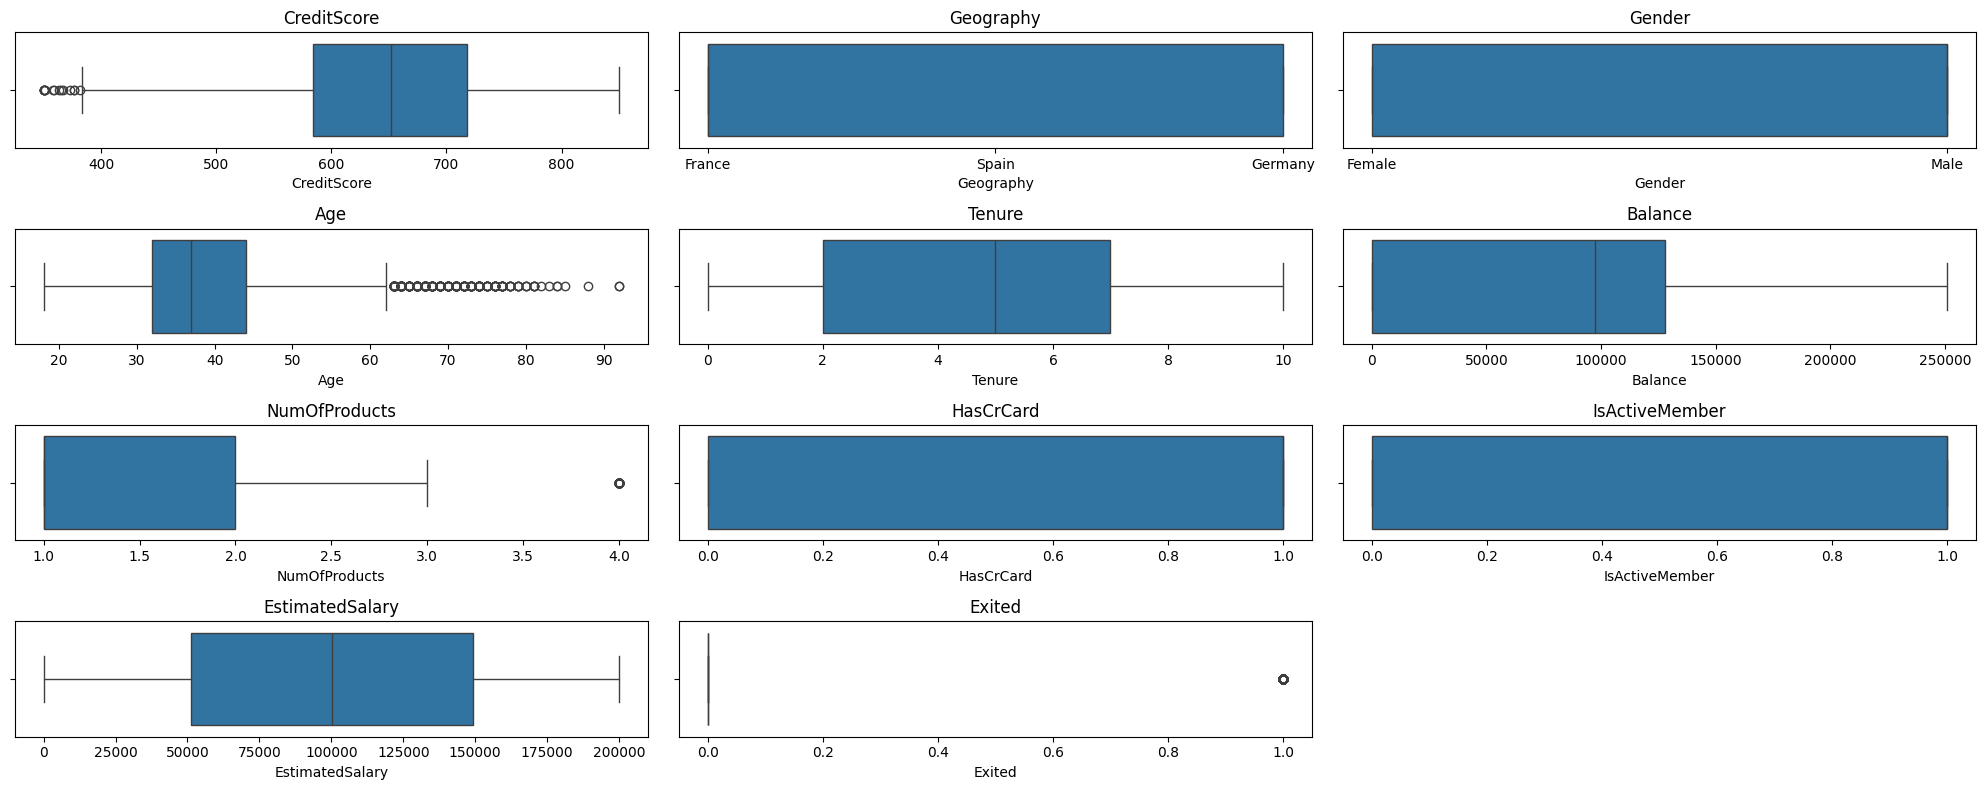

In [ ]:
columns = data_cleaned.columns.tolist()
n_columns = 3
n_rows = (len(columns) + n_columns-1) // n_columns

plt.figure(figsize=(20, 8))
for i, col in enumerate(columns):
    plt.subplot(n_rows, n_columns, i + 1)
    sns.boxplot(x=data_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

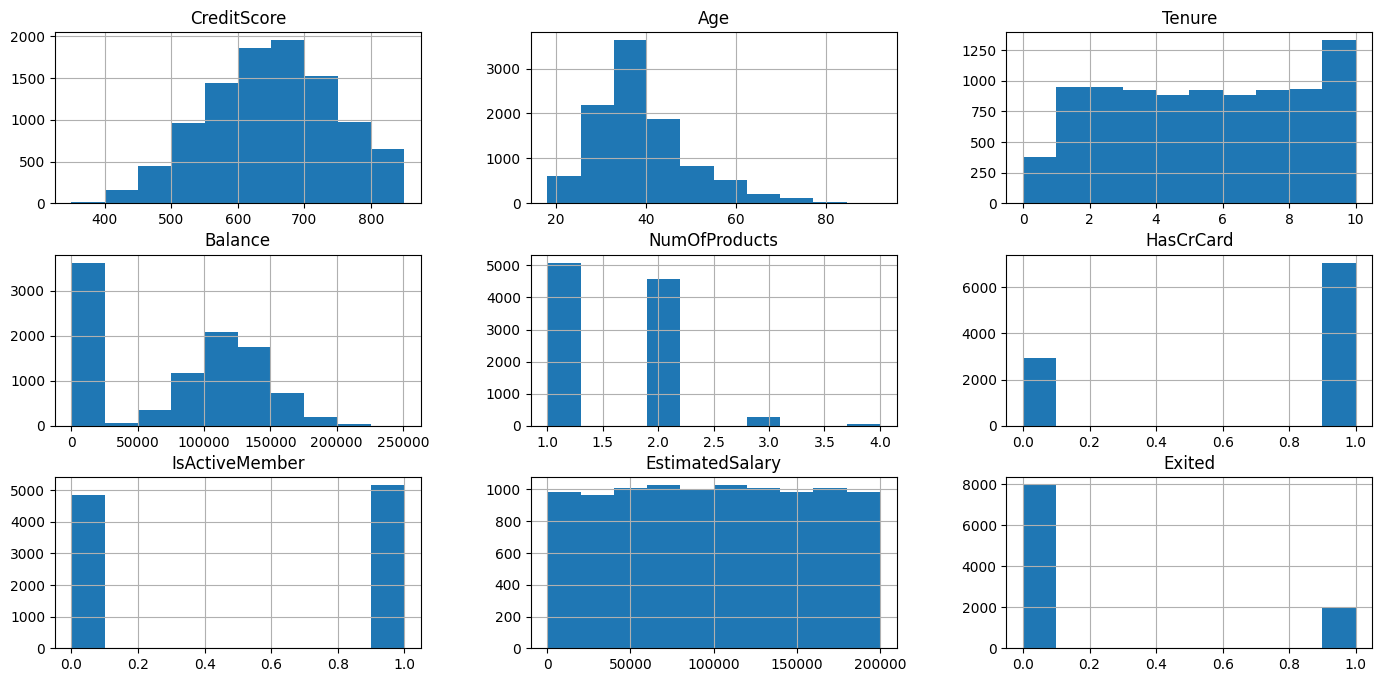

In [ ]:
data_cleaned.hist(figsize = (17, 8))

**Явных выбросов нет**

Age преобразуем в категории

CreditScore выглядит близко к нормальному распределению, выбросы на ящике с усами не вижу смысла обрабатывать, можно просто нормализовать

NumOfProducts думаю можно объединить 3 и 4, их мало

In [ ]:
data_cleaned['NumOfProducts'] = data_cleaned['NumOfProducts'].replace({4: 3})

*Анализ целевой переменной*

---



Большинство клиентов имеют значение 0 (около 80%), что говорит о дисбалансе классов

*Обработка признаков*

---



In [ ]:
#посмотрим уникальные значения по столбцам
data_cleaned.apply(lambda x: x.unique())

,0
CreditScore,"[619, 608, 502, 699, 850, 645, 822, 376, 501, ..."
Geography,"[France, Spain, Germany]"
Gender,"[Female, Male]"
Age,"[42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 2..."
Tenure,"[2.0, 1.0, 8.0, 7.0, 4.0, 6.0, 3.0, 10.0, 5.0,..."
Balance,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78..."
NumOfProducts,"[1, 3, 2]"
HasCrCard,"[1, 0]"
IsActiveMember,"[1, 0]"
EstimatedSalary,"[101348.88, 112542.58, 113931.57, 93826.63, 79..."


Опишем данные

*   кредитный рейтинг - числовая переменная

*   в выборке клиенты из трех стран (France, Spain, Germany), признак можно закодировать

*   пол клиента тоже категориальная переменная с двумя значениями (Female, Male), можно закодировать

*   возраст клиента можно представить в категориальном виде и закодировать

*   стаж клиента - числовая переменная

*   баланс - числовая переменная

*   количество продуктов банка у клиента - числовая переменная

*   наличие кредитной карты и активность клиента имеют значения от 0 до 1

*   предполагаемая зарплата - числовая переменная

*   факт ухода клиента - целевой признак









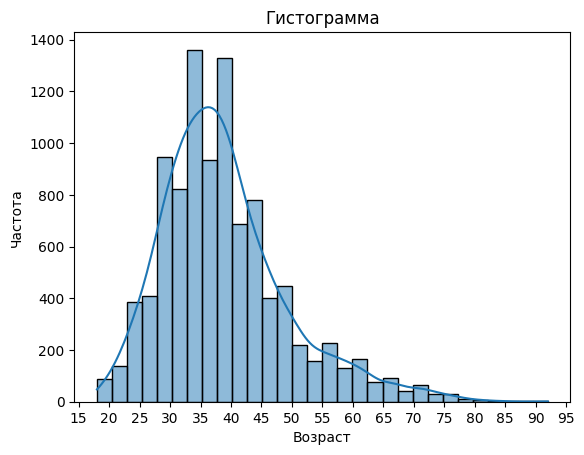

In [ ]:
sns.histplot(data_cleaned['Age'], bins=30, kde=True)
ticks = range(15, 100, 5)
plt.xticks(ticks)
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Гистограмма')
plt.show()

Распределим категории в колонке Age, основываясь на гистограмме

In [ ]:
#обработка колонки Age
bins = [0, 28, 33, 41, 46, 51, 63, 100]
labels = ['<28', '28–32', '33–40', '41–45', '46-50', '51-63', '63+']
data_cleaned['AgeGroup'] = pd.cut(data_cleaned['Age'], bins=bins, labels=labels)
data_cleaned[['AgeGroup']]

,AgeGroup
0,41–45
1,33–40
2,41–45
3,33–40
4,41–45
...,...
9995,33–40
9996,33–40
9997,33–40
9998,41–45


Закодируем этот признак

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_cleaned['AgeGroup'] = le.fit_transform(data_cleaned['AgeGroup'])
data_cleaned[['AgeGroup']]

,AgeGroup
0,2
1,1
2,2
3,1
4,2
...,...
9995,1
9996,1
9997,1
9998,2


Для стран и пола используем One-hot encoder, потому что меньше наблюдей в этих переменных

In [ ]:
data_encoded = pd.get_dummies(data_cleaned, columns=['Geography','Gender'], dtype=int)
data_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,2,1,0,0,1,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0,0,1,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,2,1,0,0,1,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,1,1,0,0,1,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,2,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,1,1,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,1,1,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,1,1,0,0,1,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,2,0,1,0,0,1


In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9991 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9991 non-null   int64  
 1   Age                9991 non-null   int64  
 2   Tenure             9083 non-null   float64
 3   Balance            9991 non-null   float64
 4   NumOfProducts      9991 non-null   int64  
 5   HasCrCard          9991 non-null   int64  
 6   IsActiveMember     9991 non-null   int64  
 7   EstimatedSalary    9991 non-null   float64
 8   Exited             9991 non-null   int64  
 9   AgeGroup           9991 non-null   int64  
 10  Geography_France   9991 non-null   int64  
 11  Geography_Germany  9991 non-null   int64  
 12  Geography_Spain    9991 non-null   int64  
 13  Gender_Female      9991 non-null   int64  
 14  Gender_Male        9991 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 1.2 MB


*Обработка пропусков*

---



Заполним пропуски в Tenure медианой внутри возрастных групп

In [ ]:
data_encoded['Tenure'] = data_encoded.groupby('AgeGroup')['Tenure'].transform(lambda x: x.fillna(x.median()))

In [ ]:
data_for_learning = data_encoded
data_for_learning.isna().sum()

,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Exited,0
AgeGroup,0


В данных больше нет пропусков

*Масштабирование данных*

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_scale = data_for_learning.columns.tolist()
data_for_learning[columns_to_scale] = scaler.fit_transform(data_for_learning[columns_to_scale])

In [ ]:
data_for_learning.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.0,1.0,1.0,0.506735,1.0,0.333333,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.0,0.0,1.0,0.562709,0.0,0.166667,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,1.0,1.0,0.0,0.569654,1.0,0.333333,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.5,0.0,0.0,0.469120,0.0,0.166667,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.0,1.0,1.0,0.395400,0.0,0.333333,0.0,0.0,1.0,1.0,0.0


*Обучение эталонных моделей*

---

Разбиение исходных данных на обучающий, контрольный м тестовый наборы

In [ ]:
from sklearn.model_selection import train_test_split

X = data_for_learning.drop('Exited', axis=1)
y = data_for_learning['Exited']

#делим данные на обучающую и тестовую выборки
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#делим обучающую выборку на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, stratify=y_train_full, random_state=42)

print("Размеры выборок")
print("Обучающая:", X_train.shape)
print("Валидационная:", X_val.shape)
print("Тестовая:", X_test.shape)

Размеры выборок
Обучающая: (5994, 14)
Валидационная: (1998, 14)
Тестовая: (1999, 14)


Обучение базовой модели без учета дисбаланса (логистическая регрессия)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

Рассчет базовых метрик качества: F1-меру и ROC AUC

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_proba)

print(f"F1-мера: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

F1-мера: 0.3170
ROC AUC: 0.7687


Низкое значение F1-мера говорит о том, что модель либо пропускает много положительных случаев, либо часто ошибается, отмечая отрицательные объекты как положительные

Высокое значение ROC AUC показывает, что модель достаточно хорошо различает классы

Итог: модель неустойчивая из-за дисбаланса целевой переменной

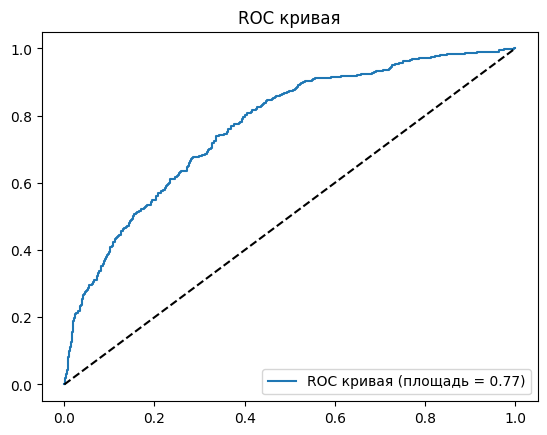

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC кривая (площадь = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # диагональ
plt.title('ROC кривая')
plt.legend(loc='lower right')
plt.show()

Видно, что модель выше диагонали, значит, она действительно извлекает закономерности из данных

*Оптимизация с учетом дисбаланса*

---



Используем random oversampling, он случайно дублирует примеры меньшего класса

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Подберем гиперпараметры для случайного леса

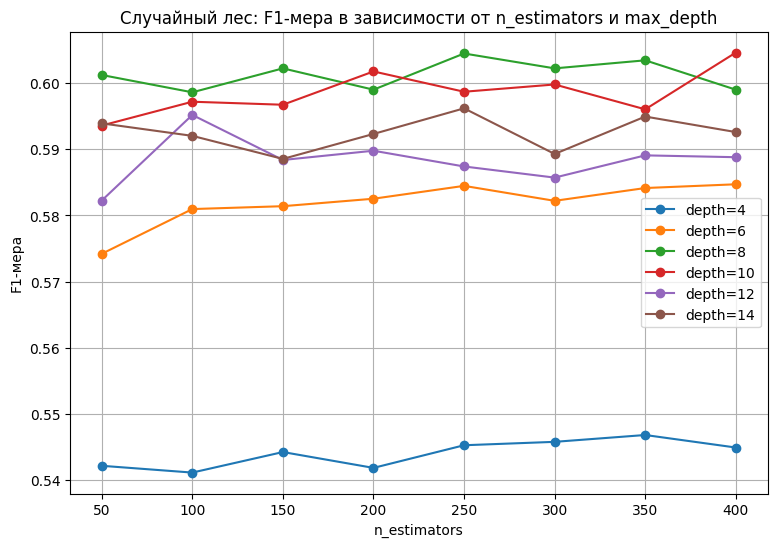

In [ ]:
from sklearn.ensemble import RandomForestClassifier

results = []

for depth in range(4, 15, 2):
  for n in range(50, 401, 50):
    model = RandomForestClassifier(n_estimators=n, max_depth=depth, class_weight='balanced', random_state=42)
    model.fit(X_resampled, y_resampled)

    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)

    results.append((depth, n, f1))

#преобразуем в таблицу для удобства
results_data = pd.DataFrame(results, columns=['max_depth', 'n_estimators', 'F1'])

#визуализация зависимости F1-меры от n_estimators и для max_depth
plt.figure(figsize=(9, 6))
for depth in range(4, 15, 2):
  subset = results_data[results_data['max_depth'] == depth]
  plt.plot(subset['n_estimators'], subset['F1'], marker='o', label=f"depth={depth}")
plt.title("Случайный лес: F1-мера в зависимости от n_estimators и max_depth")
plt.xlabel("n_estimators")
plt.ylabel("F1-мера")
plt.legend()
plt.grid(True)
plt.show()

Лучший результат при n_estimators = 400, max_depth = 10

Подберем гиперпараметры для дерева решений

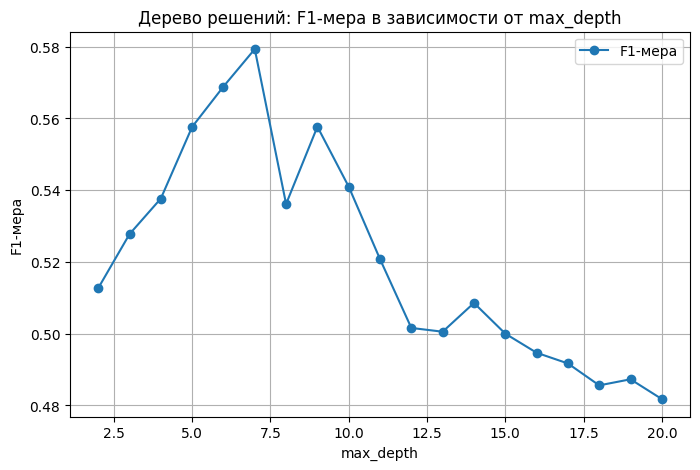

In [ ]:
from sklearn.tree import DecisionTreeClassifier

f1_scores = []

for depth in range(2, 21):
  model = DecisionTreeClassifier(max_depth=depth, class_weight='balanced', random_state=42)
  model.fit(X_resampled, y_resampled)

  y_pred = model.predict(X_val)
  f1 = f1_score(y_val, y_pred)

  f1_scores.append(f1)

#визуализация зависимости F1-меры от max_depth
plt.figure(figsize=(8, 5))
plt.plot(range(2, 21), f1_scores, marker='o', label='F1-мера')
plt.title("Дерево решений: F1-мера в зависимости от max_depth")
plt.xlabel("max_depth")
plt.ylabel("F1-мера")
plt.legend()
plt.grid(True)
plt.show()

Лучший результат при max_depth = 7

Подберем гиперпараметры для логистической регрессии

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


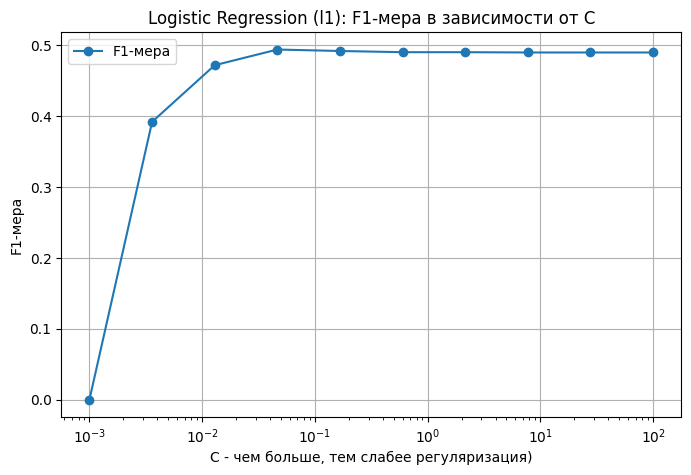

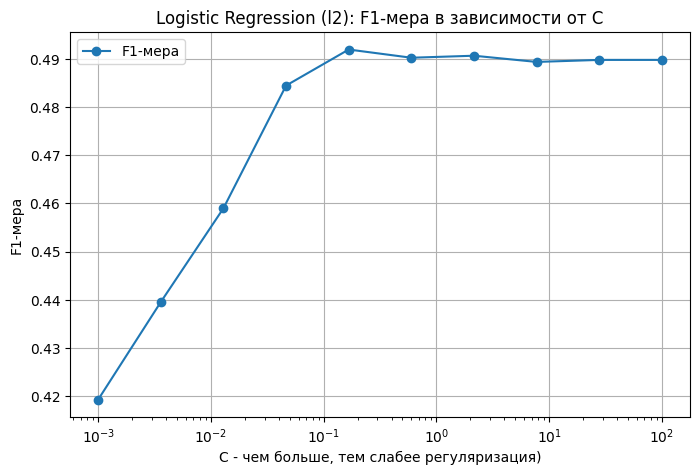

In [ ]:
#диапазон для степени регуляризации модели
C_values = np.logspace(-3, 2, 10)
results = []

for penalty in ['l1', 'l2']:
  f1_scores = []
  for C in C_values:
    solver = 'saga' if penalty == 'l1' else 'lbfgs'

    model = LogisticRegression(class_weight='balanced', penalty=penalty, C=C, solver=solver, random_state=42)
    model.fit(X_resampled, y_resampled)

    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)

    f1_scores.append(f1)
    results.append((penalty, C, f1))

  #визуализация зависимости F1-меры от penalty, C и solver
  plt.figure(figsize=(8, 5))
  plt.plot(C_values, f1_scores, marker='o', label='F1-мера')
  plt.xscale('log')
  plt.title(f"Logistic Regression ({penalty}): F1-мера в зависимости от С")
  plt.xlabel("C - чем больше, тем слабее регуляризация)")
  plt.ylabel("F1-мера")
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
#вывод лучших гиперпараметров
results_df = pd.DataFrame(results, columns=['penalty', 'C', 'F1'])
best_row = results_df.loc[results_df['F1'].idxmax()]
print(f"Лучшая логистическая регрессия: penalty={best_row.penalty}, C={best_row.C:.3f}")
print(f"F1 = {best_row.F1:.3f}")

Лучшая логистическая регрессия: penalty=l1, C=0.046
F1 = 0.494


Посмотрим модели с лучшими гиперпараметрами вместе

In [ ]:
#логистическая регрессия
log_reg = LogisticRegression(class_weight='balanced', penalty='l1', C=0.046, solver='saga', random_state=42)
log_reg.fit(X_resampled, y_resampled)

#дерево решений
tree = DecisionTreeClassifier(max_depth=7, class_weight='balanced', random_state=42)
tree.fit(X_resampled, y_resampled)

#случайный лес
forest = RandomForestClassifier(n_estimators=400, max_depth=10, class_weight='balanced', random_state=42)
forest.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=400,
                       random_state=42)

In [ ]:
models = {
    "Логистическая регрессия": log_reg,
    "Дерево решений": tree,
    "Случайный лес": forest
}

for name, model in models.items():
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_proba)
    print(f"{name}: F1 = {f1:.3f}, ROC AUC = {roc_auc:.3f}")

Логистическая регрессия: F1 = 0.494, ROC AUC = 0.773
Дерево решений: F1 = 0.579, ROC AUC = 0.831
Случайный лес: F1 = 0.605, ROC AUC = 0.851


Максимальное значение F1-меры у случайного леса

*Итоговое тестирование и сравнение*

---




In [ ]:
final_model = forest

#модель на независимом тестовом наборе
y_test_pred = final_model.predict(X_test)
y_test_proba = final_model.predict_proba(X_test)[:, 1]

f1_test = f1_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_proba)

print(f"F1 = {f1_test:.3f}")
print(f"ROC AUC = {roc_auc_test:.3f}")

F1 = 0.591
ROC AUC = 0.850


Модель хорошо различает клиентов

Значение F1 около 0.6 считается достаточно хорошим результатом для задач с дисбалансом классов

Значение ROC AUC означает, что в 85% пар ушедший/оставшийся клиент модель присвоит более высокую вероятность ухода тому, кто действительно ушел

Высокий ROC AUC при умеренной F1 говорит о том, что модель в целом хорошо различает классы, но ещё нужно оптимизировать модель классификации, чтобы повысить F1


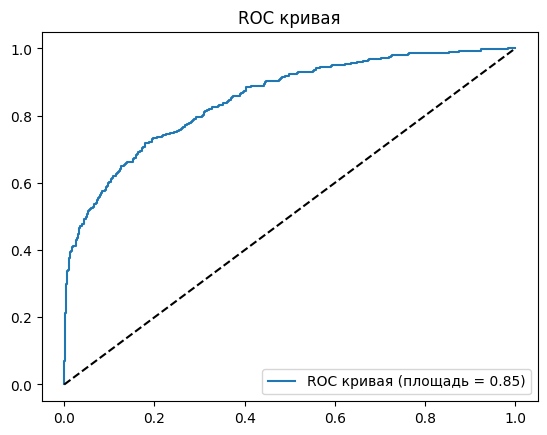

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC кривая (площадь = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC кривая')
plt.legend(loc='lower right')
plt.show()

ROC-кривая значительно отдалена от диагонали случайного угадывания, что подтверждает стабильную способность модели к классификации

*Итоги*

---


1. Ценность модели:

Модель может использоваться как инструмент раннего предупреждения об уходе клиентов;

Модель может позволить расставлять приоритеты в работе сотрудников банка - сосредоточиться на клиентах с высокой вероятностью ухода;

При ROC AUC = 0.85 можно ожидать надежное ранжирование по риску ухода.

2. Бизнес-применение:

Сегментация клиентов по риску ухода (например, высокий, средний, низкий риск);

Персонализированные предложения для сохранения клиента (бонусы - кубышки от тинька, например);

Мониторинг динамики вероятности ухода.

3. Рекомендации по улучшению:

Провести оптимизацию порога классификации, чтобы увеличить F1;

Добавить новые признаки, отражающие поведение клиентов.

*Проверим гипотезу через корреляцию изначальных данных*

---



In [ ]:
data[['NumOfProducts', 'Exited']].corr()

,NumOfProducts,Exited
NumOfProducts,1.00000,-0.04782
Exited,-0.04782,1.00000


Между количеством продуктов у клиента и фактом его ухода из банка коэффициент корреляции равен -0.0478. Отрицательное значение указывает на тенденцию снижения вероятности ухода при увеличении числа продуктов, однако сила связи очень низкая.
Следовательно, гипотеза о том, что клиенты с несколькими продуктами значительно менее склонны к уходу, не подтверждается статистически
